# Your Title Here

**Name(s)**: Huiting Chen, Coco

**Website Link**: (your website link)

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction



To explore this question, I analyze two datasets from a [recipe recommendation website](https://www.food.com/), containing recipes and their ratings since 2008:
 - Recipe dataset: 83,782 rows and 12 columns, containing information about each recipe
 - Ratings dataset: 731,927 rows and 5 columns, recording users' ratings for different recipes.

For this research, we need to create a new column named 'avg_rating' recording the average rating to each recipe. 

This insight could help home cooks find more appealing recipes, assist recipe creators in tailoring their content, and guide food platforms in improving recommendations.

## Step 2: Data Cleaning and Exploratory Data Analysis

First, download the dataset. By looking at the head we can see that recipe dataset has a column 'Unnamed: 0' which doesn't contain any useful information, so we drop the column.

In [3]:
RAW_recipes = pd.read_csv('RAW_recipes.csv')
RAW_interactions = pd.read_csv('RAW_interactions.csv')

In [4]:
RAW_recipes.head()

,Unnamed: 0,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,111,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9
1,115,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11
2,118,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9
3,119,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7
4,125,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13


In [5]:
RAW_interactions.head()

,user_id,recipe_id,date,rating,review
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...


In [6]:
RAW_recipes = RAW_recipes.drop('Unnamed: 0', axis=1)
RAW_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13


The columns we care about are minutes and avg_rating. We need column 'rating' to calculate avg_rating. So we first put columns minutes and rating in the same dataframe. To do so, we use left merge.

Then we take a look at the data.

In [7]:
RAW_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83782 entries, 0 to 83781
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            83781 non-null  object
 1   id              83782 non-null  int64 
 2   minutes         83782 non-null  int64 
 3   contributor_id  83782 non-null  int64 
 4   submitted       83782 non-null  object
 5   tags            83782 non-null  object
 6   nutrition       83782 non-null  object
 7   n_steps         83782 non-null  int64 
 8   steps           83782 non-null  object
 9   description     83712 non-null  object
 10  ingredients     83782 non-null  object
 11  n_ingredients   83782 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.7+ MB


In [8]:
RAW_recipes['nutrition'] = RAW_recipes['nutrition'].str[1:-1].str.split(', ')

In [9]:
calories = RAW_recipes['nutrition'].str[0].astype(float)
total_fat = RAW_recipes['nutrition'].str[1].astype(float)
sugar = RAW_recipes['nutrition'].str[2].astype(float)
sodium = RAW_recipes['nutrition'].str[3].astype(float)
protein = RAW_recipes['nutrition'].str[4].astype(float)
saturated_fat = RAW_recipes['nutrition'].str[5].astype(float)
carbohydrates = RAW_recipes['nutrition'].str[6].astype(float)
RAW_recipes['calories'] = calories
RAW_recipes['total_fat'] = total_fat
RAW_recipes['sugar'] = sugar
RAW_recipes['sodium'] = sodium
RAW_recipes['protein'] = protein
RAW_recipes['saturated_fat'] = saturated_fat
RAW_recipes['carbohydrates'] = carbohydrates
RAW_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,138.4,10.0,50.0,3.0,3.0,19.0,6.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,595.1,46.0,211.0,22.0,13.0,51.0,26.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,194.8,20.0,6.0,32.0,22.0,36.0,3.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,878.3,63.0,326.0,13.0,20.0,123.0,39.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,267.0,30.0,12.0,12.0,29.0,48.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83777,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
83778,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
83779,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0
83780,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [12]:
RAW = RAW_recipes.merge(RAW_interactions, how='left', left_on='id', right_on='recipe_id')
RAW.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,sugar,sodium,protein,saturated_fat,carbohydrates,user_id,recipe_id,date,rating,review
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...",...,50.0,3.0,3.0,19.0,6.0,386585.0,333281.0,2008-11-19,4.0,"These were pretty good, but took forever to ba..."
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,...,211.0,22.0,13.0,51.0,26.0,424680.0,453467.0,2012-01-26,5.0,Originally I was gonna cut the recipe in half ...
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,...,6.0,32.0,22.0,36.0,3.0,29782.0,306168.0,2008-12-31,5.0,This was one of the best broccoli casseroles t...
3,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,...,6.0,32.0,22.0,36.0,3.0,1196280.0,306168.0,2009-04-13,5.0,I made this for my son's first birthday party ...
4,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,...,6.0,32.0,22.0,36.0,3.0,768828.0,306168.0,2013-08-02,5.0,Loved this. Be sure to completely thaw the br...


In [31]:
print('The number of NaN values in column protein: {}'.format(RAW['protein'].isna().sum()))
print('The number of NaN values in column total_fat: {}'.format(RAW['total_fat'].isna().sum()))

The number of NaN values in column protein: 0
The number of NaN values in column total_fat: 0


In [14]:
#fill ratings of 0 with np.nan
RAW['rating'] = RAW['rating'].apply(lambda x: np.nan if x==0.0 else x)

In [15]:
avg_rating = RAW.groupby('id')['rating'].mean()
RAW = RAW.merge(avg_rating, left_on='id', right_index=True)

In [16]:
recipes = RAW_recipes.merge(avg_rating, left_on='id', right_index=True)

<Axes: xlabel='rating', ylabel='Proportion'>

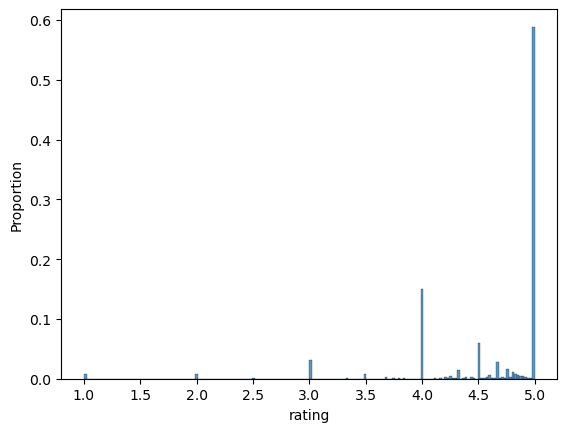

In [17]:
#Univariate Analysis
import seaborn as sns
sns.histplot(data=recipes, x='rating', stat='proportion')

<Axes: xlabel='protein', ylabel='Proportion'>

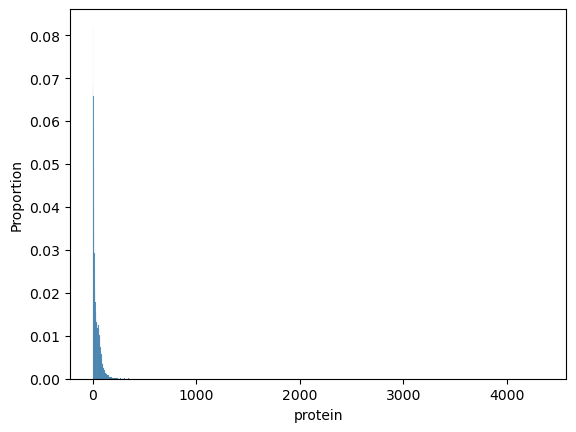

In [18]:
#sns.histplot(recipes[recipes['minutes'] <= 500], x='minutes')
sns.histplot(data=recipes, x='protein', stat='proportion')

<Axes: xlabel='protein', ylabel='Proportion'>

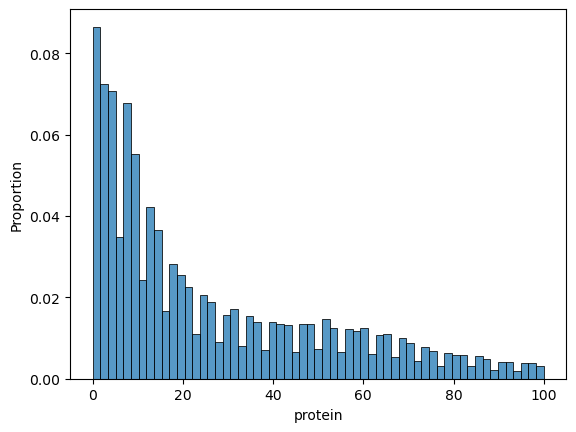

In [19]:
sns.histplot(data=recipes[recipes['protein']<=100], x='protein', stat='proportion')

<Axes: xlabel='protein', ylabel='total_fat'>

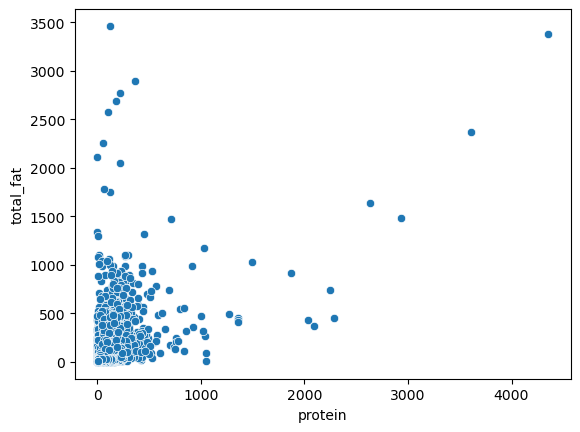

In [20]:
#Bivariate Analysis
#sns.scatterplot(data = recipes.groupby('minutes')['rating'].mean())
sns.scatterplot(data = recipes, x='protein', y='total_fat')

<Axes: xlabel='minutes', ylabel='rating'>

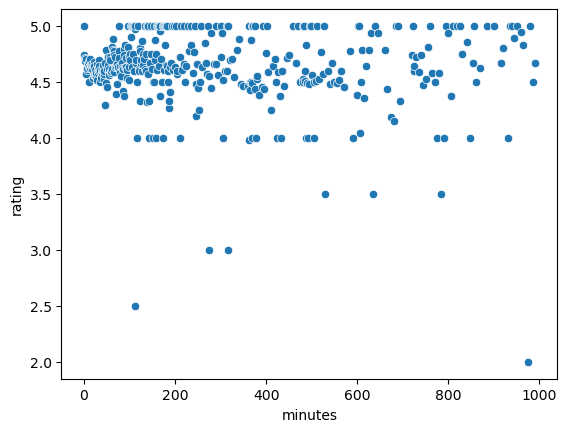

In [21]:
sns.scatterplot(data = recipes[recipes['minutes']<=1000].groupby('minutes')['rating'].mean())

## Step 3: Assessment of Missingness

In [22]:
# TODO
from scipy.stats import ks_2samp
ks_2samp(RAW.loc[RAW['rating_x'].isna(), 'minutes'], RAW.loc[RAW['rating_x'].notna(), 'minutes'])

KstestResult(statistic=np.float64(0.09353217884751186), pvalue=np.float64(1.3757058888130603e-107), statistic_location=np.int64(48), statistic_sign=np.int8(-1))

In [23]:
ks_2samp(RAW.loc[RAW['description'].isna(), 'minutes'], RAW.loc[RAW['description'].notna(), 'minutes'])

KstestResult(statistic=np.float64(0.09398865260525346), pvalue=np.float64(0.2501601046591513), statistic_location=np.int64(30), statistic_sign=np.int8(1))

## Step 4: Hypothesis Testing

In [24]:
# TODO
#Null Hypothesis: the amount of total fat is similar for different amount of protein.

#Alternative Hypothesis: the amount of total fat higher for recipes with high protein.

print(recipes[recipes['protein']<=50]['total_fat'].mean())
print(recipes[recipes['protein']>50]['total_fat'].mean())
ks_2samp(recipes[recipes['protein']<=recipes['protein'].median()]['total_fat'], recipes[recipes['protein']>recipes['protein'].median()]['total_fat'])
#mean,,,m

22.539019022166325
64.43200634574389


KstestResult(statistic=np.float64(0.4415785072523358), pvalue=np.float64(0.0), statistic_location=np.float64(21.0), statistic_sign=np.int8(1))

## Step 5: Framing a Prediction Problem

In [25]:
# rating and ingredients


## Step 6: Baseline Model

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
pl = Pipeline([('decisionTree', LinearRegression())])
pl

Pipeline(steps=[('decisionTree', LinearRegression())])

In [27]:
from sklearn.model_selection import train_test_split
X = recipes.dropna()[['calories', 'total_fat', 'sugar', 'sodium', 'protein']]
y = recipes.dropna()['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.metrics import root_mean_squared_error
pl.fit(X_train, y_train)
print('RMSE for train: {}'.format(root_mean_squared_error(pl.predict(X_train), y_train)))
print('RMSE for train: {}'.format(root_mean_squared_error(pl.predict(X_test), y_test)))

RMSE for train: 0.6377771636324238
RMSE for train: 0.6467409865220956


## Step 7: Final Model

In [29]:
# TODO

## Step 8: Fairness Analysis

In [30]:
# TODO